In [36]:
#import math

def Distance(instance1, instance2, dimension):
  x = 0
  for i in range(dimension):
    x += (instance1[i] - instance2[i])**2
    #print([i,x])
  
  #return math.sqrt(x)
  return x**(1/2)



In [37]:
data1 = [1,1,1,"a"]
data2 = [2,2,2,"b"]
l = Distance(data1, data2, 3)

print(l)

1.7320508075688772


In [48]:
#import operator

def getNeighbors(trainingSet, testInstance, k):
  distance = []
  length = len(testInstance) - 1

  for x in range(len(trainingSet)):
    dist = Distance(testInstance, trainingSet[x], length)
    distance.append((trainingSet[x], dist))

#  distance.sort(key = operator.itemgetter(1))
  distance.sort(key = 1)
  neighbors = []

  for x in range(k):
    neighbors.append(distance[x][0])
  
  return neighbors


In [49]:
trainSet = [data1, data2]
testInstance = [3, 3, 3]
k = 1

neighbors = getNeighbors(trainSet, testInstance, k)
print(neighbors)

TypeError: ignored

In [47]:
help(list())

Help on list object:

class list(object)
 |  list() -> new empty list
 |  list(iterable) -> new list initialized from iterable's items
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt


In [3]:
df = pd.DataFrame()
n = 20

for i in range(3):
  if i == 0:
    x = pd.Series(np.random.uniform(0.5, 2.8, n))
    y = pd.Series(x * np.random.uniform(0.8, 1.2, n))
  elif i == 1:
    x = pd.Series(np.random.uniform(2.2, 3.8, n))
    y = pd.Series(np.random.uniform(0.5, 1.8, n))
  else:
    x = pd.Series(np.random.uniform(3.2, 3.8, n))
    y = pd.Series(np.random.uniform(2.2, 3.8, n))
  label = pd.Series(np.full(n, i))
  temp_df = pd.DataFrame(np.c_[x, y, label])
  df = pd.concat([df, temp_df])

df.index = np.arange(0, len(df), 1)


In [4]:
class_0 = df[df[2] == 0]
class_1 = df[df[2] == 1]
class_2 = df[df[2] == 2]

data = df[[0, 1]]
data_class = pd.Series(df[2])


In [5]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(data, data_class)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

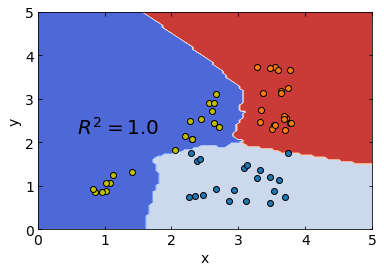

In [18]:
grid_line = np.arange(-10, 10, 0.05)
X, Y = np.meshgrid(grid_line, grid_line)
Z = clf.predict(np.array([X.ravel(), Y.ravel()]).T)
Z = Z.reshape(X.shape)
r2 = clf.score(data, data_class)


plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'DejaVu Sans'

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
 
fig = plt.figure()
ax1 = plt.subplot(111)

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.set_xlim(0, 5)
#ax1.set_xticks(range(100))
ax1.set_ylim(0, 5)

ax1.contourf(X, Y, Z, cmap='coolwarm')
ax1.scatter(class_0[0], class_0[1], label='class=0', edgecolors='black', color = "y")
ax1.scatter(class_1[0], class_1[1], label='class=1', edgecolors='black')
ax1.scatter(class_2[0], class_2[1], label='class=2', edgecolors='black')
plt.text(0.5, 2.2, '$\ R^{2}=$' + str(round(r2, 2)), fontsize=20)
 
#plt.legend()

plt.show()
plt.close()